# Séance 1 :  Deep Learning - Introduction à Pytorch 

Les notebooks sont très largement inspirés des cours de **N. Baskiotis et B. Piwowarski**. Ils peuvent être complétés efficacement par les tutoriels *officiels* présents sur le site de pytorch:
https://pytorch.org/tutorials/

Au niveau de la configuration, toutes les installations doivent fonctionner sur Linux et Mac. Pour windows, ça peut marcher avec Anaconda à jour... Mais il est difficile de récupérer les problèmes.

* Aide à la configuration des machines: [lien](https://dac.lip6.fr/master/environnement-deep/)
* Alternative 1 à Windows: installer Ubuntu sous Windows:  [Ubuntu WSL](https://ubuntu.com/wsl)
* Alternative 2: travailler sur Google Colab (il faut un compte gmail + prendre le temps de comprendre comment accéder à des fichers) [Colab](https://colab.research.google.com)

# A. Préambule & syntaxe

Les lignes suivantes permettent d'importer pytorch et vérifier si un GPU est disponible.

**NOTE:** pour cette séance, ce n'est pas important => Début standard pour la suite

In [1]:
import torch
print("La version de torch est : ",torch.__version__)
print("Le calcul GPU est disponible ? ", torch.cuda.is_available())
# pour les possesseurs de mac M1 avec la dernière version de pytorch:
print("Le calcul GPU est disponible ? ", torch.backends.mps.is_available())
# NOTE: pour cette séance, ce n'est pas important => Début standard pour la suite

import matplotlib.pyplot as plt
import numpy as np
import sklearn

La version de torch est :  2.2.2+cpu
Le calcul GPU est disponible ?  False
Le calcul GPU est disponible ?  False


## Syntaxe

Le principal objet manipulé sous Pytorch est **torch.Tensor** qui correspond à un tenseur mathématique (généralisation de la notion de matrice en $n$-dimensions), très proche dans l'utilisation de **numpy.array**.   Cet objet est optimisé pour les calculs sur GPU ce qui implique quelques contraintes plus importantes que sous **numpy**. En particulier :
* le type du tenseur manipulé est très important et les conversions ne sont pas automatique (**FloatTensor** de type **torch.float**, **DoubleTensor** de type **torch.double**,  **ByteTensor** de type **torch.byte**, **IntTensor** de type **torch.int**, **LongTensor** de type **torch.long**). Pour un tenseur **t** La conversion se fait très simplement en utilisant les fonctions : **t.double()**, **t.float()**, **t.long()** ...
* la plupart des opérations ont une version *inplace*, c'est-à-dire qui modifie le tenseur plutôt que de renvoyer un nouveau tenseur; elles sont suffixées par **_** (**add_** par exemple).

Voici ci-dessous quelques exemples d'opérations usuelles, n'hésitez pas à vous référez à la [documentation officielle](https://pytorch.org/docs/stable/tensors.html) pour la liste exhaustive des opérations.


In [2]:
# Création de tenseurs et caractéristiques
## Créer un tenseur à partir d'une liste
print(torch.tensor([[1.,2.,3.],[2.,3,4.]])) 
## Créer un tenseur  tenseur rempli de 1 de taille 2x3x4
print(torch.ones(2,3,4)) 
## tenseur de zéros de taille 2x3 de type float
print(torch.zeros(2,3,dtype=torch.float))  


tensor([[1., 2., 3.],
        [2., 3., 4.]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
# L'opération inverse (tenseur => Structure python)
a = torch.ones(2,3)
print(a,"=>",a.tolist())
b=a.sum()
print(b,"=>",b.item())


tensor([[1., 1., 1.],
        [1., 1., 1.]]) => [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]
tensor(6.) => 6.0


In [4]:

## tirage uniforme entier entre 10 et 15, 
## remarquez l'utilisation du _ dans random pour l'opération inplace
print(torch.zeros(2,3).random_(10,15)) 
## tirage suivant la loi normale
a=torch.zeros(2,3).normal_(1,0.1)
print(a)
## equivalent à zeros(3,4).normal_
b = torch.randn(3,4) 
## Création d'un vecteur
c = torch.randn(3)

tensor([[11., 10., 12.],
        [10., 10., 11.]])
tensor([[0.9564, 1.0154, 1.0468],
        [1.0945, 1.0050, 0.9833]])


In [5]:

## concatenation de tenseurs
print(torch.cat((a,a),1))
## Taille des tenseurs/vecteurs shape => size
print(a.size(1),b.shape,c.size())
## Conversion de type
print(a.int(),a.int().type())

tensor([[0.9564, 1.0154, 1.0468, 0.9564, 1.0154, 1.0468],
        [1.0945, 1.0050, 0.9833, 1.0945, 1.0050, 0.9833]])
3 torch.Size([3, 4]) torch.Size([3])
tensor([[0, 1, 1],
        [1, 1, 0]], dtype=torch.int32) torch.IntTensor


In [6]:

# Opérations élémentaires sur les tenseurs 
## produit scalaire (et contrairement à numpy, que produit scalaire)
print(c.dot(c))
## produit matriciel : utilisation de @ ou de la fonction mm
print("prod mat: ", a.mm(b), a @ b)
## transposé
print("transpose :", a.t(),a.T)
## index du maximum selon une dimension
print("argmax : ",a.argmax(dim=1))
## somme selon une dimension/de tous les éléments
print("sum: ", b.sum(1), b.sum()) 
## moyenne selon  une dimension/sur tous les éléments
print("mean: ", b.mean(1), b.mean())


tensor(1.4837)
prod mat:  tensor([[ 0.5836, -1.8755, -2.5789, -1.2666],
        [ 0.7607, -2.0588, -2.6397, -1.2314]]) tensor([[ 0.5836, -1.8755, -2.5789, -1.2666],
        [ 0.7607, -2.0588, -2.6397, -1.2314]])
transpose : tensor([[0.9564, 1.0945],
        [1.0154, 1.0050],
        [1.0468, 0.9833]]) tensor([[0.9564, 1.0945],
        [1.0154, 1.0050],
        [1.0468, 0.9833]])
argmax :  tensor([2, 0])
sum:  tensor([-1.6782, -0.2751, -3.1077]) tensor(-5.0610)
mean:  tensor([-0.4195, -0.0688, -0.7769]) tensor(-0.4217)


In [7]:
## ATTENTION: la spécificité et les capacités des tenseurs empêchent les conversions à la volée
# ce qui marchait en numpy ne marche plus en torch

print(a@[[1], [1], [1]])    # ERREUR de type (même résultat avec n'importe quelle opération)
print(a*2)                  # OK pour un scalaire
print(a*[2.,2.,2.])         # ERREUR de type

TypeError: unsupported operand type(s) for @: 'Tensor' and 'list'

In [8]:

## somme/produit/puissance termes a termes
print("a",a)
print("a+a",a+a)
print("a*a",a*a)
print("a**2",a**2)


a tensor([[0.9564, 1.0154, 1.0468],
        [1.0945, 1.0050, 0.9833]])
a+a tensor([[1.9128, 2.0309, 2.0935],
        [2.1891, 2.0100, 1.9666]])
a*a tensor([[0.9147, 1.0311, 1.0957],
        [1.1980, 1.0100, 0.9669]])
a**2 tensor([[0.9147, 1.0311, 1.0957],
        [1.1980, 1.0100, 0.9669]])


Avant d'exécuter la boite suivante, prédire les dimensions des résultats

In [9]:

## attention ! comme sous numpy, il peut y avoir des pièges ! 
## Vérifier toujours les dimensions !!
a = torch.ones(5,1)*2
b = torch.ones(5)

## la première opération fait un broadcast et le résultat est tenseur à 2 dimensiosn,
## le résultat de la deuxième opération est bien un vecteur
print('soustraction (v1): ',a-b)
print('soustraction (v2): ',a.t()-b)
# cet exemple est critique... Voici pourquoi:
print('Somme v1', (a-b).sum())
print('Somme v2', (a.t()-b).sum())

# ATTENTION dans la fonction cout qui suit !!!

soustraction (v1):  tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
soustraction (v2):  tensor([[1., 1., 1., 1., 1.]])
Somme v1 tensor(25.)
Somme v2 tensor(5.)


In [10]:

## changer les dimensions du tenseur (la taille totale doit être inchangée) = np.reshape
b = torch.randn(3,4) 
print(b)
print(b.view(2,6)) # view  = reshape

# on utilise souvent view pour passer de matrice à vecteur
e=torch.tensor([[1],[1],[1],[1]], dtype=torch.float)
d = b@e
print(d)
# conversion en vecteur
print(d.view(-1)) # view (-1) => jocker = c'est lui trouve la bonne dimension

# usage typique
y = torch.tensor([1,-1,1], dtype=torch.float)
print(d > y)            # résultat catastrophique (dispatch)
print(d.view(-1) > y)   # résultat attendu

tensor([[-0.3997,  0.0980,  0.4807,  1.1317],
        [-0.4236, -0.3451, -1.7769,  1.2873],
        [ 0.8219, -0.6601, -0.4483,  1.0149]])
tensor([[-0.3997,  0.0980,  0.4807,  1.1317, -0.4236, -0.3451],
        [-1.7769,  1.2873,  0.8219, -0.6601, -0.4483,  1.0149]])
tensor([[ 1.3107],
        [-1.2582],
        [ 0.7283]])
tensor([ 1.3107, -1.2582,  0.7283])
tensor([[ True,  True,  True],
        [False, False, False],
        [False,  True, False]])
tensor([ True, False, False])


In [11]:
# jeux de dimension

e=torch.tensor([[1],[1],[1],[1]], dtype=torch.float)
print(e.size(), e)

# suppression d'une dimension 'vide'
e2 = e.squeeze()
print(e2.size(), e2)

# ajout d'une dimension (le vecteur e2 devient le premier élément d'une dimension)
e3 = e2.unsqueeze(0) # dimension ajoutée
print(e3.size(), e3)

# retour à e à partir de e2: => Il faut ajouter une seconde dimension
e4 = e2.unsqueeze(1) # dimension ajoutée
print(e4.size(), e4)

# note: dans ce cas, on pouvait aussi jouer avec view
print(e2.view(-1,1))


torch.Size([4, 1]) tensor([[1.],
        [1.],
        [1.],
        [1.]])
torch.Size([4]) tensor([1., 1., 1., 1.])
torch.Size([1, 4]) tensor([[1., 1., 1., 1.]])
torch.Size([4, 1]) tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[1.],
        [1.],
        [1.],
        [1.]])


# B. Quelques exercices rapides

### Mise en forme

**Construire le tenseur:**
$$\begin{pmatrix}1 & 2 & 3\\ 4 & 5 & 6 \end{pmatrix} $$
* construire d'abord la liste
* en faire un tenseur d'entier
* le remettre à la bonne dimension & l'afficher pour obtenir un l'affichage suivant:
```
tensor([[1, 2, 3],
        [4, 5, 6]])
```
* faire en sorte que cette matrice soit le premier élément d'une nouvelle dimension (`unsqueeze`):
```
tensor([[[1, 2, 3],
         [4, 5, 6]]])
```

In [16]:
# partir d'une liste d'entier
a = [i+1 for i in range(6)]

#  TODO 

test = torch.tensor([[i+1 for i in range(3)],[ i+1 for i in range(3,6) ]])
print(test)

alea = torch.rand([6,6])
print(alea)
alea2 = torch.where(alea>3, 3)
print(alea2)


tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[0.3106, 0.2928, 0.3753, 0.6208, 0.8573, 0.8179],
        [0.9791, 0.5373, 0.6221, 0.4433, 0.2701, 0.1022],
        [0.0210, 0.0404, 0.1458, 0.3672, 0.2368, 0.8169],
        [0.9261, 0.5290, 0.5319, 0.5156, 0.7928, 0.4078],
        [0.3499, 0.3719, 0.4190, 0.6753, 0.0117, 0.8768],
        [0.0803, 0.5616, 0.6198, 0.0710, 0.1961, 0.7236]])


TypeError: where() received an invalid combination of arguments - got (Tensor, int), but expected one of:
 * (Tensor condition)
 * (Tensor condition, Tensor input, Tensor other, *, Tensor out)
 * (Tensor condition, Number self, Tensor other)
 * (Tensor condition, Tensor input, Number other)
 * (Tensor condition, Number self, Number other)



* générer un tenseur aléatoire de dimension 6x6
* mettre tous les éléments $> 0.75$ à 3, tous les éléments $>0.5$ à 1, tous les autres à 0 (exemple ci-dessous)
```
tensor([[0.2904, 0.8363, 0.1369, 0.6678, 0.7031, 0.8621],
        [0.2346, 0.0459, 0.9227, 0.4143, 0.1521, 0.9640],
        [0.1871, 0.2266, 0.8589, 0.4375, 0.6851, 0.2822],
        [0.6622, 0.1185, 0.6011, 0.8171, 0.7270, 0.1480],
        [0.7245, 0.5880, 0.2003, 0.1000, 0.4129, 0.1631],
        [0.7844, 0.2308, 0.6906, 0.8632, 0.7242, 0.8772]])
tensor([[0., 3., 0., 1., 1., 3.],
        [0., 0., 3., 0., 0., 3.],
        [0., 0., 3., 0., 1., 0.],
        [1., 0., 1., 3., 1., 0.],
        [1., 1., 0., 0., 0., 0.],
        [3., 0., 1., 3., 1., 3.]])
```
* compter les 0, 1 et 3 (trouver la commande directe)
```
tensor(23) tensor(6) tensor(7)
```
* Construire la matrice b suivante en utilisant obligatoirement un produit matriciel:
```
tensor([[1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.]])
```
* calculer la somme des carrés des écarts entre les deux matrices précedentes
```
tensor(366.)
```
* afficher les matrices précédentes avec imshow (ce qui oblige à sortir des tenseurs pour utiliser matplotlib... Après l'avoir importé)

<img src="media/matrices2.png">


In [17]:
a = torch.rand(6,6)
print(a)
a[a<=0.5] = 0
a[a>0.75] = 3
a[(a>0.5) & (a<1)] = 1
print(a)
print((a==0).sum(), (a==1).sum(), (a==3).sum())

b = torch.ones(6,1)@torch.tensor([float(i+1) for i in range(6)]).view(1,6)
print(b)

print(((a-b)**2).sum())



tensor([[0.2854, 0.3762, 0.9323, 0.6585, 0.1016, 0.0856],
        [0.1643, 0.4814, 0.1223, 0.2660, 0.5462, 0.2524],
        [0.6773, 0.7328, 0.5084, 0.0405, 0.9123, 0.1207],
        [0.4664, 0.9712, 0.0369, 0.3995, 0.9186, 0.1889],
        [0.0883, 0.4889, 0.8861, 0.3371, 0.8226, 0.7986],
        [0.1157, 0.7797, 0.7803, 0.0963, 0.6247, 0.5474]])
tensor([[0., 0., 3., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 0., 3., 0.],
        [0., 3., 0., 0., 3., 0.],
        [0., 0., 3., 0., 3., 3.],
        [0., 3., 3., 0., 1., 1.]])
tensor(20) tensor(7) tensor(9)
tensor([[1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.],
        [1., 2., 3., 4., 5., 6.]])
tensor(378.)


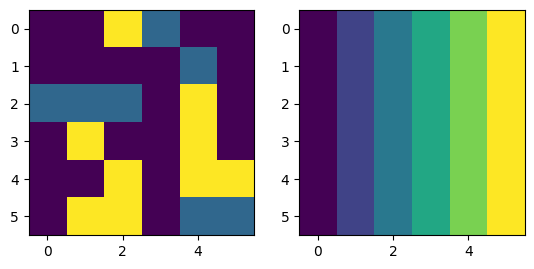

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.imshow(a.tolist())
plt.subplot(1,2,2)
plt.imshow(b.tolist())

plt.savefig("media/matrices2.png", bbox_inches='tight')


# Construction du sujet à partir de la correction

In [1]:
###  TODO )"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

### </CORRECTION> ###